In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/2019-1st-ml-month-with-kakr'

# (1) 데이터 셋 확인

## (1-1) 필요한 모듈 불러오기

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn-whitegrid')
sns.set(font_scale=2.5) 
# 일일이 Graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편리하다.

import missingno as msno

import warnings
warnings.filterwarnings('ignore')
# 워닝 메세지를 생략한다. 차후 버전관리를 위해 필요한 정보

%matplotlib inline

# (2) 데이터 불러오기

In [ ]:
df_train = pd.read_csv(data_dir + '/train.csv')
df_test = pd.read_csv(data_dir + '/test.csv')
df_submit = pd.read_csv(data_dir + '/sample_submission.csv')

## (2-1) 데이터 형태 확인

In [ ]:
df_train.shape, df_test.shape, df_submit.shape 

((891, 12), (418, 11), (418, 2))

* 각 파일을 로드하고 파일의 크기를 확인해보았습니다.
* train data는 891개, test data는 418개입니다.

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* column(feature)는 총 12개로 이루어져있습니다.
* 학습에 사용해야 할 feature는 11개, 예측해야 할 feature는 `Survived`입니다.

In [ ]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

* submit 파일은 2개의 컬럼만 있으면 됩니다.
* 어떤 사람인지 구분하는 `PassengerID`와<br> 해당 사람이 사망했는지 생존했는지 구분하는 `Survived`만 제출하면 됩니다.

In [ ]:
display(df_train.head(3), df_test.head(3), df_submit.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


,PassengerId,Survived
0,892,0
1,893,0
2,894,0


## (2-2) **타이타닉 데이터 Feature 설명**
* Survival: 생존 유무, traget값, (0=사망, 1=생존)
* pclass: 티켓 클래스, (1=1st, 2=2nd, 3=3rd)
* sex: 성별
* age: 나이
* sibsp: 함께 탑승한 형제자매, 배우자 수 총합
* parch: 함께 탑승한 부모, 자녀 수 총합
* ticket: 티켓 넘버
* fare: 탑승 요금
* cabin: 객실 넘버
* bembarked: 탑승 항구

## (2-3) 각 Feature types 확인하기

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* 데이터를 살펴보니 count값이 다른 column이 보입니다.
* 결측치가 있는 것으로 판단하고 한번 알아보도록 하겠습니다.

## (2-4) 결측치 확인하기

In [ ]:
print(df_train.isnull().sum() / df_train.shape[0])

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [ ]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

* train set과 test set에 비슷하게<br>
`Age` 피쳐에 약 20%, `Cabin`피쳐에 약 80%의 결측치가 있는 것을 확인하였습니다.

## (2-5) Target Label 확인하기

* 우리가 가지고 있는 타깃 변수는(`Survived`)입니다.
* 지금 같은 binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있습니다.

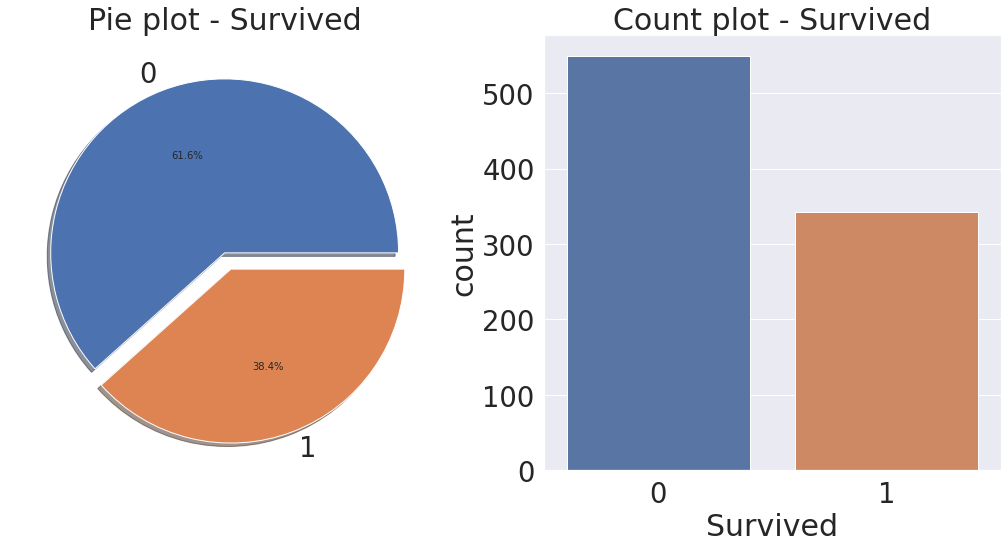

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# (3) 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

* 데이터는 매우 많기에, 데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요합니다.

* 시각화 라이브러리는 `matplotlib`, `seaborn`, `plotly` 등이 있습니다.

## (3-1) Pclass

* `Pclass`는 서수형 데이터입니다.<br>
카테고리이면서 순서가 있는 데이터 타입입니다.<br>
먼저 `Pcalss`에 따른 생존률의 차이를 살펴보겠습니다.

* 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,<br>
pandas dataframe에서는 `groupby`를 사용하면 쉽게 할 수 있습니다.

* `Pcalss`, `Survived`를 가져온 후, `pclass`로 묶습니다.<br>
그러고 나면 각 pcalss마다 0, 1이 count가 되는데,<br>
이를 평균내면 각 pclass별 생존률이 나옵니다.

* 아래와 같이 `count()`를 하면 각 `class`에 몇명이 있는 지 확인할 수 있으며, `sum()`을 하면,<br>
216명 중 생존한(`survived=1`) 사람의 총합을 주게 됩니다.

In [ ]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
# 위와 같은 작업을 crosstab으로 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# mean은 생존율을 구하게 할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


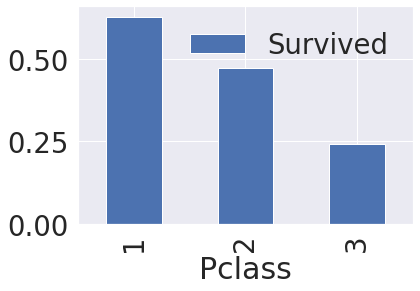

In [ ]:
# 이를 시각화 해보았습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

* 우리는 생존에 `Pclass`가 큰 영향을 미친다고 생각해볼 수 있으며<br>
나중에 모델을 세울 때 이 Feature를 사용하는 것이 좋을 것이라고 판단할 수 있습니다.

## (3-2) Sex

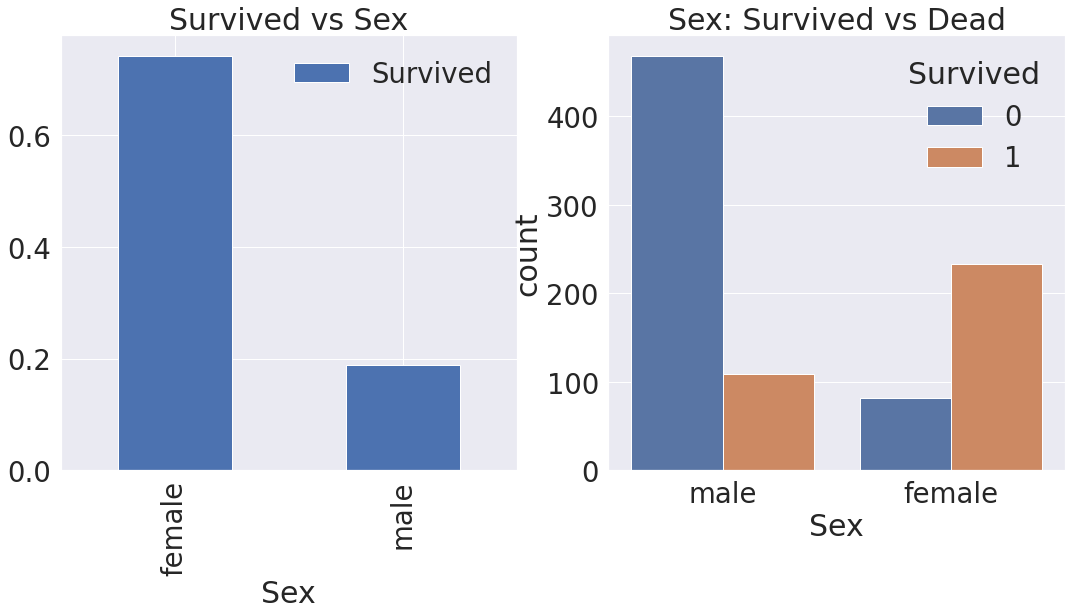

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

* 여성이 생존할 확률이 높습니다.
* `Pclass`와 마찬가지로, `Sex`도 예측 모델에 쓰일 중요한 feature임을 알 수 있습니다.

## (3-3) Both Sex and Pclass

* 이번에는 Sex, Pclass 두가지 관하여 생존이 어떻게 달라지는 지 확인해보겠습니다.

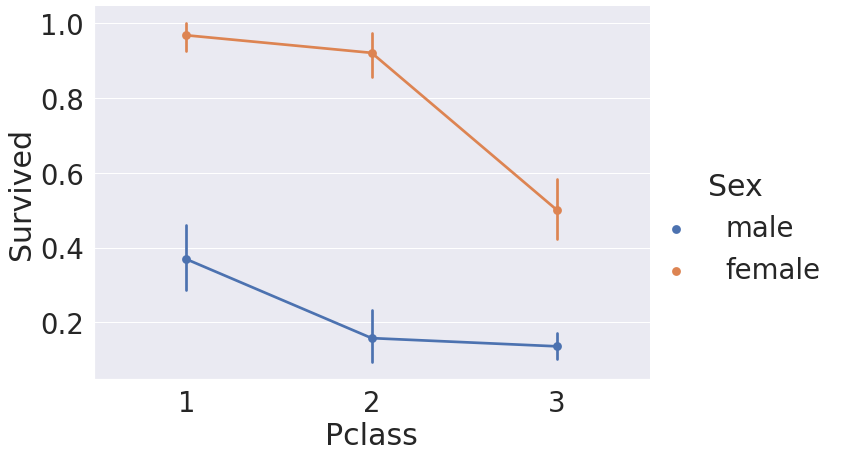

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,
               size=6, aspect=1.5)

* 모든 클래스에서 여성이 살 확률이 남성보다 높은 것을 알 수 있습니다.

## (3-4) Age

In [ ]:
print('제일 나이 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 어린 탑승객: 0.4 years
탑승객 평균 나이: 29.7 years


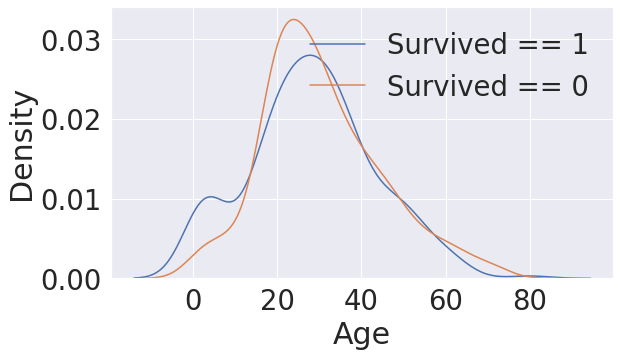

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

* 해당 히스코그램을 보면, 어린 나이 구간에서 생존율이 상대적으로 높다는 것을 확인할 수 있습니다.

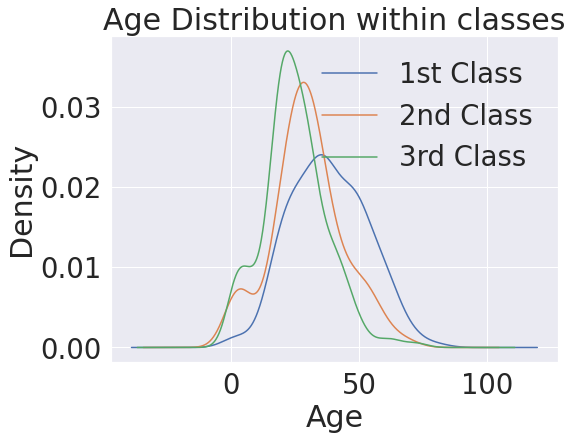

In [ ]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* 위의 그래프 클래스가 높아질 수록, 나이 연령대가 높아짐을 확인할 수 있습니다.
* 나이대가 높아질 수록 생존확률이 어떻게 달라지는지 알고 싶기에 **누적 확률**을 활용한 시각화를 하겠습니다.

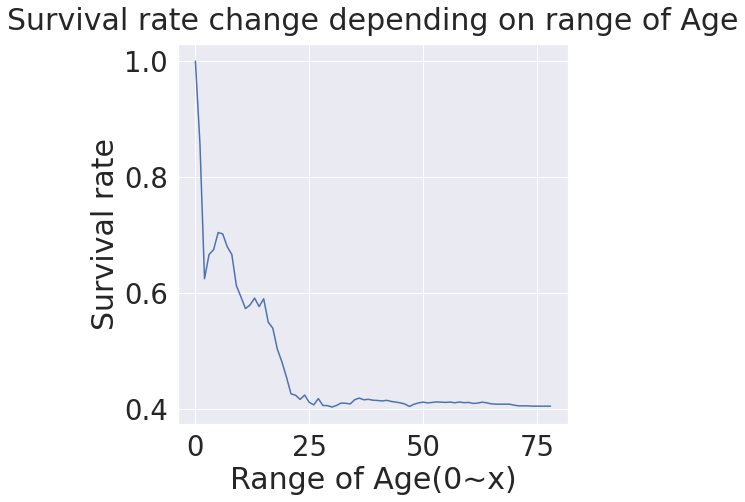

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴 수록 생존율이 확실히 높은 것을 확인할 수 있습니다.
* 이를 통해 나이도 중요한 피쳐임을 확인할 수 있습니다.

> 지금까지 얻은 분석을 종합
* 여자이거나
* 나이가 어리고
* 클래스가 높을 수록<BR>


**생존확률이 높음을 확인할 수 있습니다.**

## (3-5) Embarked

* `Embarked`는 탑승한 항구를 나타냅니다.

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

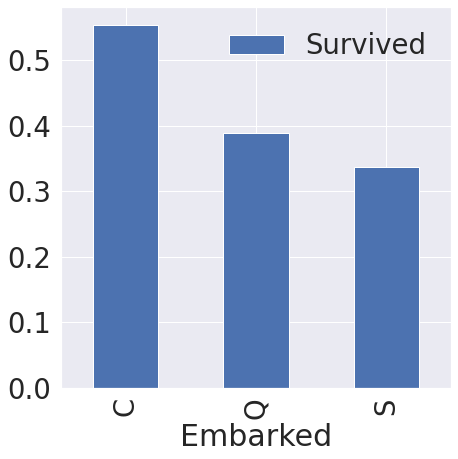

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

* 탑승한 곳에 따라 생존률의 차이가 많아 보이지는 않습니다.
* 그래도 차이가 존재하므로 피쳐로 사용해보겠습니다.

* 이제 다른 피쳐와의 상관관계도 한번 알아보도록 하겠습니다.

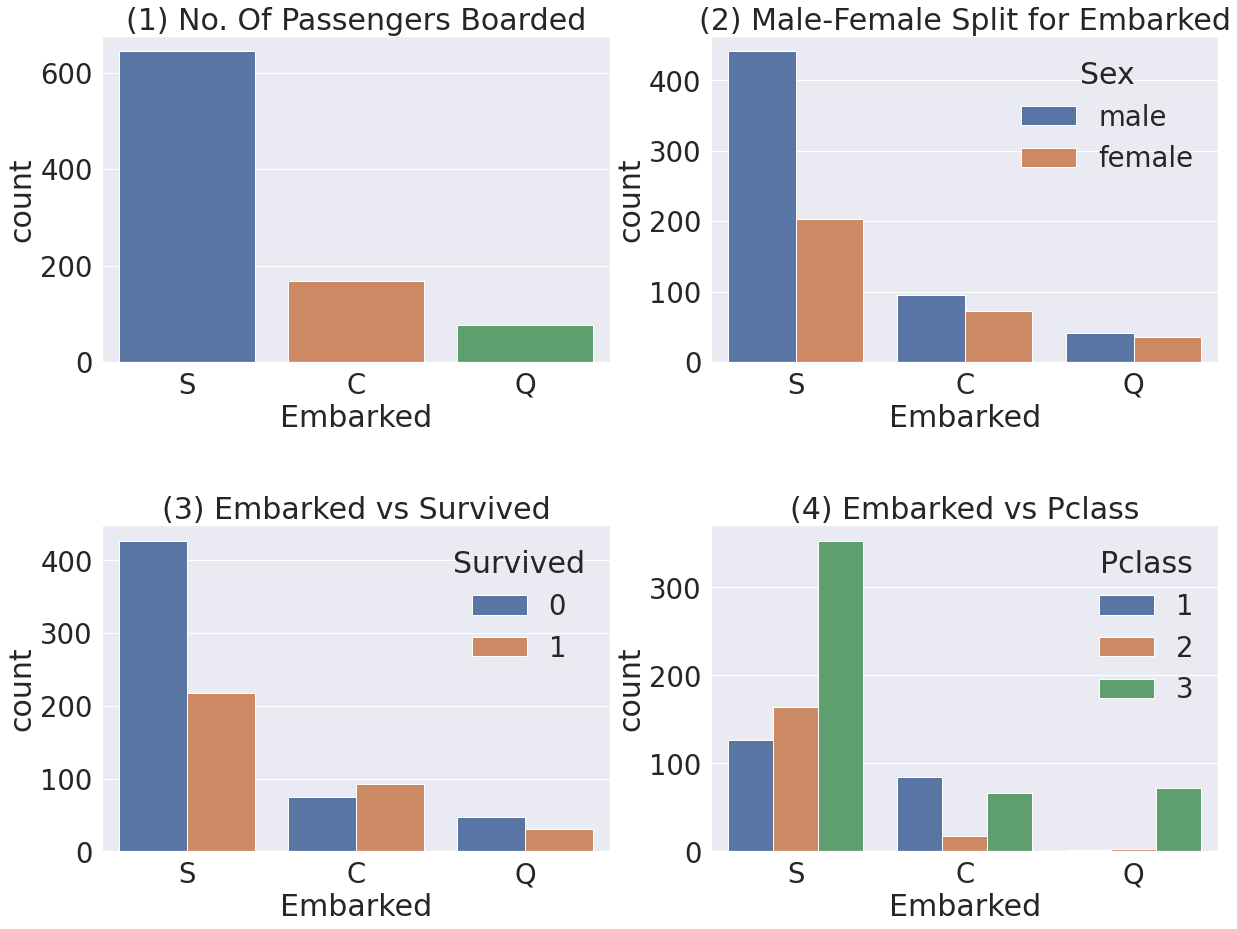

In [ ]:
f, ax=plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show() 

* Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했습니다.
* Figure(2) - C와 Q는 남녀의 비율이 비슷하며 S는 남자가 더 많습니다.
* Figure(3) - 생존확률이 S 경우 많이 낮은 것을 볼수 있습니다. 
* Figure(4) - Class로 split해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서 그렇습니다.<BR>
S는 3rd class가 많아서 생존확률이 낮게 나옵니다.

## (3-6) Family - SibSp(형제 자매) + Parch(부모, 자녀)

* `SibSp`와 `Parch`를 합치면 함께 탑승한 가족의 수가 될 것입니다.
* 이 두 피쳐를 더해서 새로운 피쳐 `FamilySize`를 만들어보도록 하겠습니다.

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
# 자신을 포함해야 하니 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


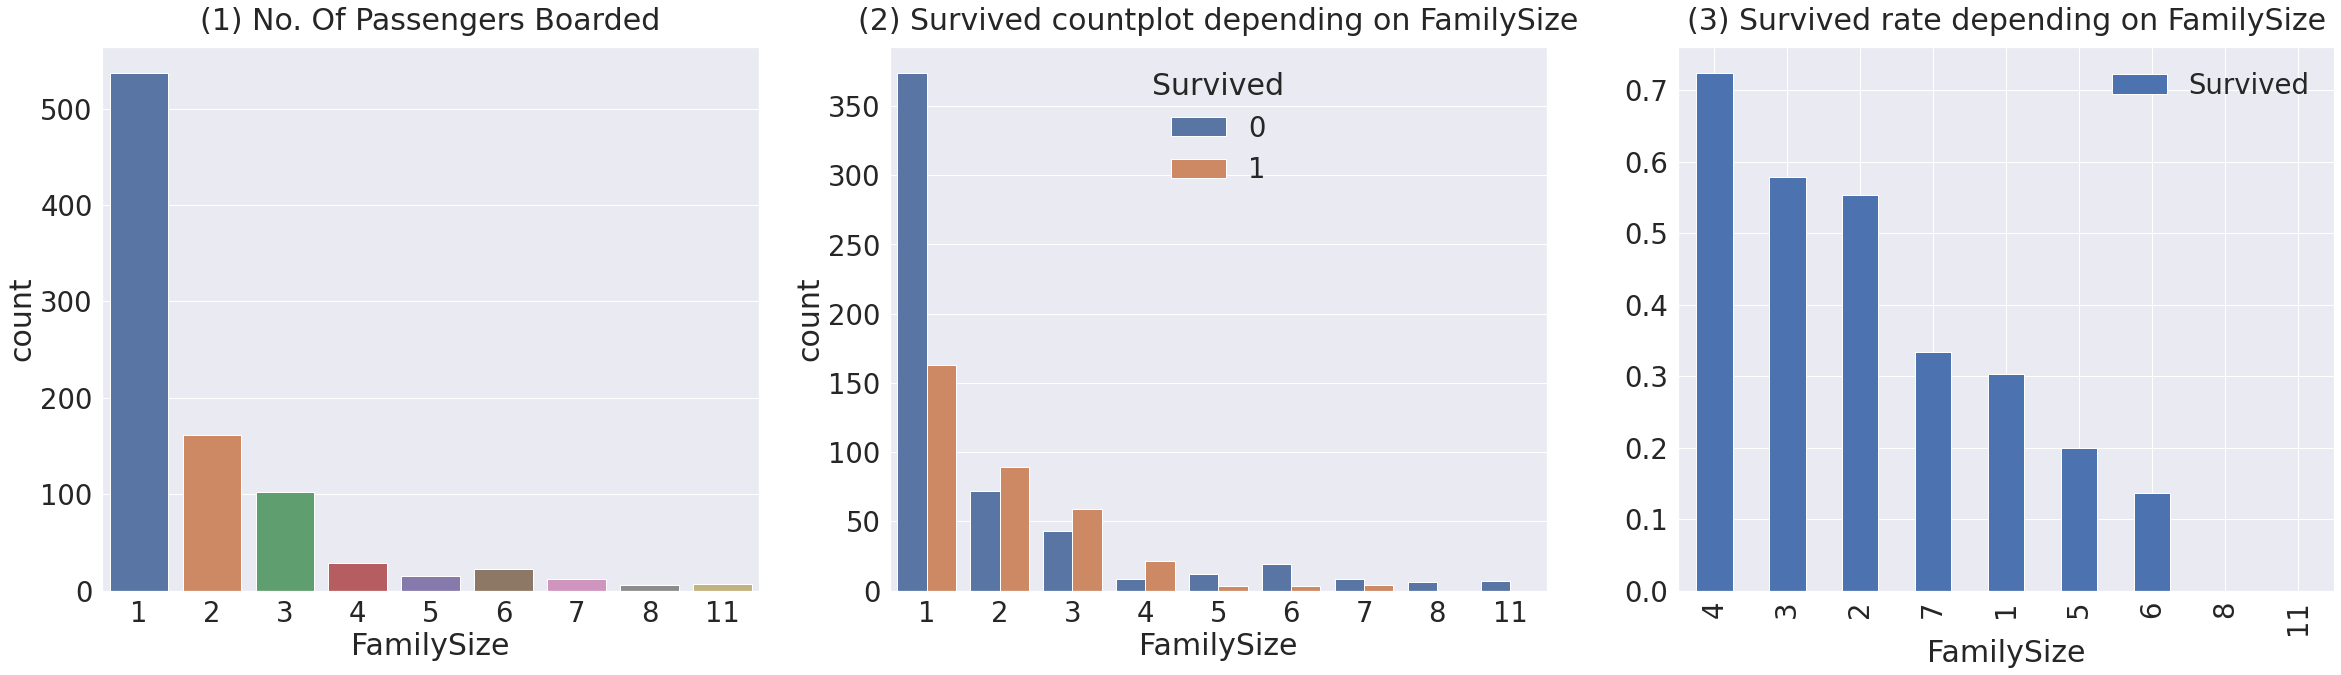

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고, 다음으로 2, 3, 4명입니다.
* Figure(2) - 가족 크기에 따른 생존비교입니다. 
* Figure(3) - 가족이 4명인 경우가 가장 생존확률이 높습니다.<br>
가족 수가 많아질 수록, 생존확률이 낮아집니다.<br>
가족 수가 너무 작아도 너무 커도 생존 확률이 작습니다. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

## (3-7) Fare
* `Fare`는 탑승 요금입니다. 연속적인 데이터이므로 histogram을 그려보도록 하겠습니다.

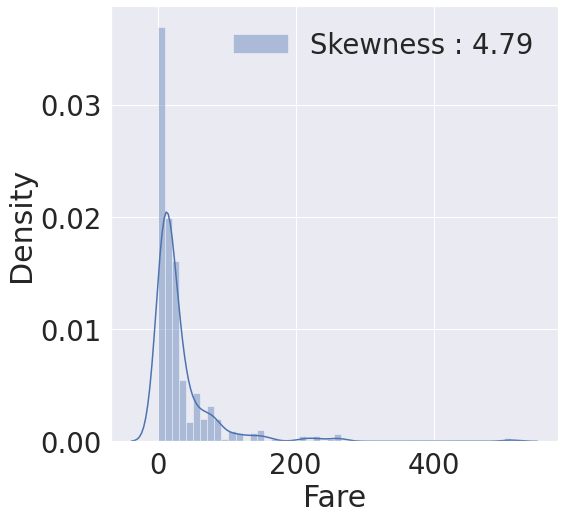

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* 결측치를 확인한 결과에서 test set에 `Fare`는 널 값이 존재했습니다.

* 따라서 평균값으로 결측값을 치환하겠습니다.

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [ ]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
df_train.head()['Fare']

0    1.981001
1    4.266662
2    2.070022
3    3.972177
4    2.085672
Name: Fare, dtype: float64

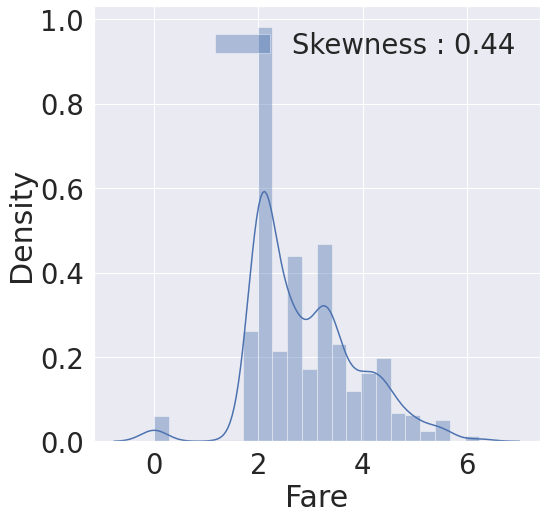

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* 로짓 변환을 통해 비대칭성을 사라지게 했습니다.(아직 비대칭성은 남아있습니다)
* 방금한 것은 **feature engineering**에 들어가는 부분인데, 여기서 작업했습니다.

## (3-8) Cabin
* 이 Feature는 결측값이 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않습니다.

In [ ]:
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [ ]:
df_train.head()[['PassengerId', 'Cabin']]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


## (3-9) Ticket

* 이 Feature에는 결측값이 없었습니다.
* String Data이므로 추가적인 작업이 필요합니다.

In [ ]:
df_train['Ticket'].value_counts()

1601          7
CA. 2343      7
347082        7
CA 2144       6
347088        6
             ..
349248        1
SC 1748       1
36209         1
A./5. 3235    1
3101264       1
Name: Ticket, Length: 681, dtype: int64

# (4) 특성 공학(Feature Engineering)

* 본격적인 `feature engineering`을 시작해보겠습니다.

**"Garbage In, Garbage Out"**<br>

가장 먼저, dataset에 존재하는 null data를 채우려고 합니다.<br>아무리 좋은 모델도, 안좋은 데이터가 들어오면 안좋은 결과로 나오기 마련입니다.<br>

null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야 될 부분입니다.

특히, Feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로,<br>
train 뿐만 아니라 test도 똑같이 적용해줘야 합니다.

## (4-1) Fill Null

### (4-1-1) Fill Null in Age using title

In [ ]:
df_train['Age'].isnull().sum()

177

In [ ]:
df_train.head()['Age']

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

* `Age`에는 null data가 177개나 습니다.<br>
여기서 우리는 title + statistics를 사용해보겠습니다.

영어에서는 Miss, Mrr, Mrs같은 title이 존재합니다.<br>
각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용해보겠습니다.

pandas series에는 data를 string으로 바꿔주는 `str` method, 거기에 정규표현식을 적용하게 해주는 `extract` method가 있습니다.<br>
이를 사용하여 title을 쉽게 추출할 수 있습니다. title을 `Initial` column에 저장하겠습니다.

In [ ]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
df_train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [ ]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* pandas의 croostab을 이용하여 우리가 추출한 `Initail`과 `Sex`간의 count를 살펴보았습니다.

In [ ]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [ ]:
df_train['Initial']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

* `replace`를 통해 남성 이름의 title은 `Mr`로, 여성 이름의 title은 `Mrs` 해당되지 않은 이름은 `Other`로 변경하였습니다.

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


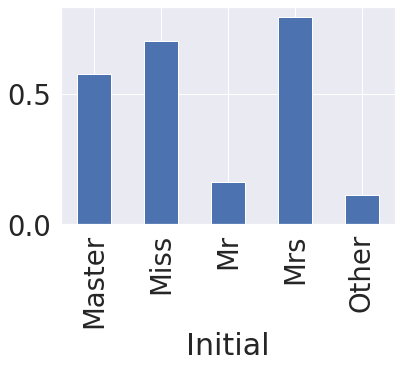

In [ ]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

이제 본격적으로 Null을 채울 것입니다. null data를 채우는 방법은 정말 많이 존재합니다.

statistics를 활용하는 방법도 있고, null data가 없는 데이터를 기반으로 <br>새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다.<br>
(딥러닝에서 디노이징 오토인코더 라는 것이 있습니다)

여기서는 statistics를 활용하는 방법을 사용할 것입니다.<br>
여기서 statistrics는 train data의 것을 의미합니다.<br>
**우리는 언제나 test를 unseen으로 둔 상태로 나둬야 합니다**<br>
train에서 얻은 statistics를 기반으로 test의 null data를 채워줘야 합니다.

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* 각 Initail 그룹별 Age 평균 값을 사용해서 채워 넣도록 하겠습니다.

In [ ]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

* train & test 셋에 Age의 결측 처리가 완전히 끝난 것을 확인할 수 있습니다.

* 여기서는 간단하게 Null을 채웠지만, 다양한 방법을 쓴 예시들이 다른 커널에 존재합니다.

[참고하면 좋은 커널](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)

### (4-1-2) Fill Null in Embarked

In [ ]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [ ]:
df_train['Embarked'].fillna('S', inplace=True)

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

* 성공적으로 `Embarked`의 결측치가 사라진 것을 확인할 수 있습니다.

## (4-2) Change Age

`Age`는 현재 continuos feature입니다.

이대로 모델을 세울 수 있지만 `Age`를 몇 개의 그룹으로 나누어 카테고리화 시켜줄 수도 있습니다.

continuos를 categorical로 바꾸면 자칫 **information loss**가 생길 수도 있지만,<br> 본 토튜리얼에서는 다양한 방법을 소개하는 것이 목적이라 진행하겠습니다.

방법은 여러가지가 있습니다.
1. dataframe의 indexing 방법인 loc를 사용하여 채울 수 있습니다.
2. apply를 사용해 함수를 넣어줄 수도 있습니다.

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [ ]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [ ]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## (4-3) Change Intial, Embarked Sex

* 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다.
* 컴퓨터가 인식할 수 있도록 수치화를 시켜줘야 합니다.
* `map` method를 가지고 간단히 할 수 있습니다.

In [ ]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [ ]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [ ]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

결측값도 없고, `int`형으로 잘 바뀐 모습을 확인할 수 있습니다.
마찬가지로 `sex`에도 적용시켜줍니다.

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

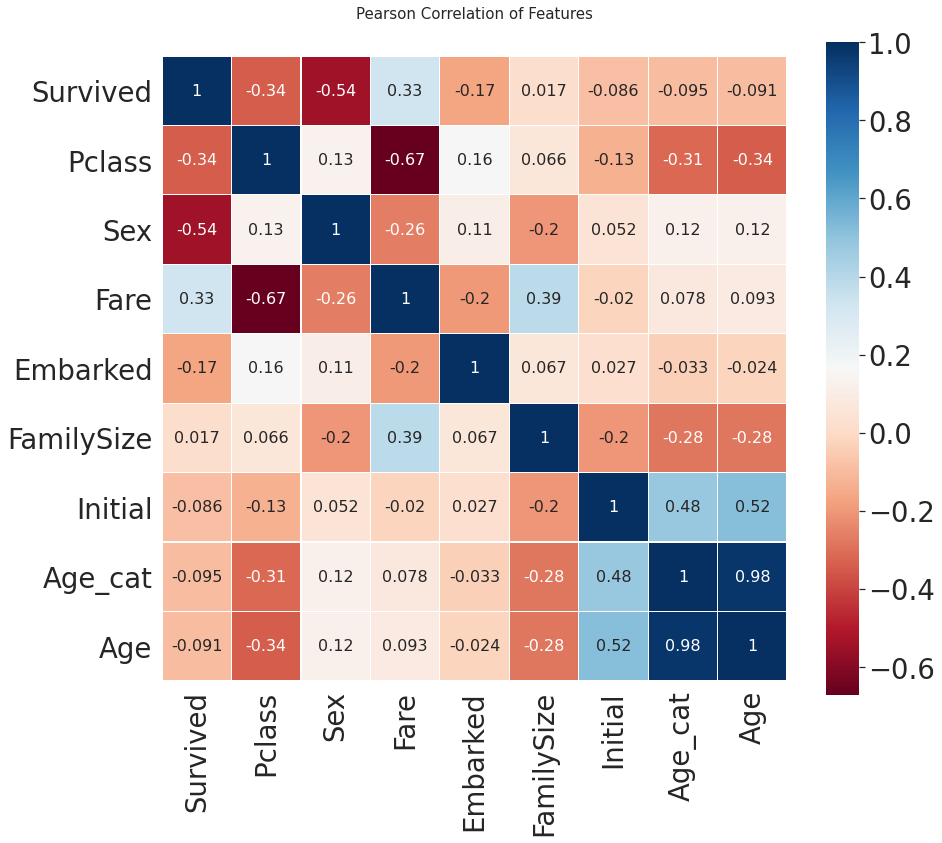

In [ ]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

EDA에서 살펴봤듯이
`Sex`와 `Pclass`가 `Survived`에 상관관계가 어느 정도 있음을 볼 수 있습니다.<br>

또한 우리가 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 `feature`들이 없다는 것입니다.

**1또는 -1의 상관관계를 가진 feature A, B가 있다면 우리가 얻을 수 있는 정보는 사실 하나일 것입니다.**

## (4-5) One-hot encoding on Initial and Embarked

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

> **Tips**: 가끔 범주형 변수가 100개가 넘어가는 경우가 있습니다.<br>
이때 원핫인코딩을 사용하게 되면 차원의 저주가 발생합니다.

## (4-6) Drop columns

In [ ]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [ ]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [ ]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [ ]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

# (5) 모델 개발 및 학습

In [ ]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## (5-1) Preparation - Split dataset into train, vaild, test set

In [ ]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [ ]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [ ]:
y_tr.shape, y_vld.shape

((712,), (179,))

## (5-2) Model generation and prediction

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 80.45% 정확도로 생존을 맞춤


학습된 모델은 feature importance를 가지게 됩니다.<br>
우리는 이것을 확인하여 지금 만든 모델이 어떤 feture에 영향을 많이 받았는 지 확인할 수 있습니다.<br>

쉽게 말해, $y = 4x_{1}+2x_{2}+1x_{3}$을 생각하면, 우리는 $x_{1}$이 결과값(10)에 큰 영향을 준다고 생각할 수 있습니다.<br>

feature importance는 4, 2, 1을 이야기하며, $x_{1}$ 피쳐가 가장 큰 영향을 미친다고 말할 수 있습니다.



In [ ]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

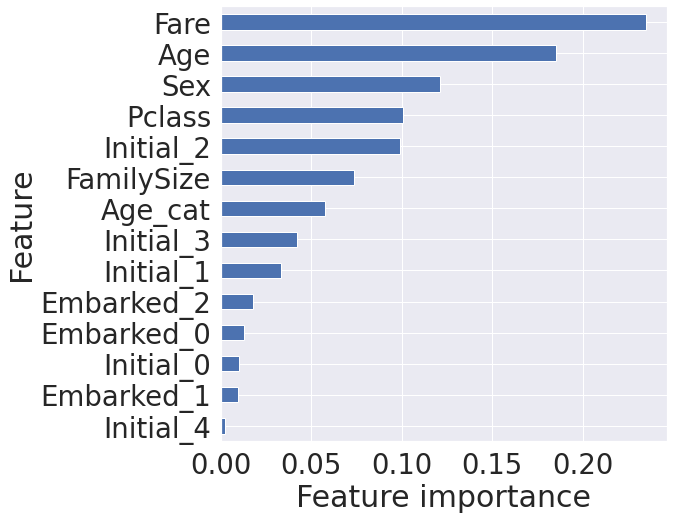

In [ ]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## (5-3) Keras를 사용한 NN 모델 개발

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [ ]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=500,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 20ms/step - loss: 0.9808 - accuracy: 0.5112 - val_loss: 0.6399 - val_accuracy: 0.6425
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7894 - accuracy: 0.5660 - val_loss: 0.6364 - val_accuracy: 0.6480
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7845 - accuracy: 0.5520 - val_loss: 0.6226 - val_accuracy: 0.6425
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7653 - accuracy: 0.5716 - val_loss: 0.6269 - val_accuracy: 0.6425
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.5646 - val_loss: 0.6378 - val_accuracy: 0.6704
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.5688 - val_loss: 0.6489 - val_accuracy: 0.7374
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5899 - val_loss: 0.6517 - val_accuracy: 0.7709
Epoch 8/500


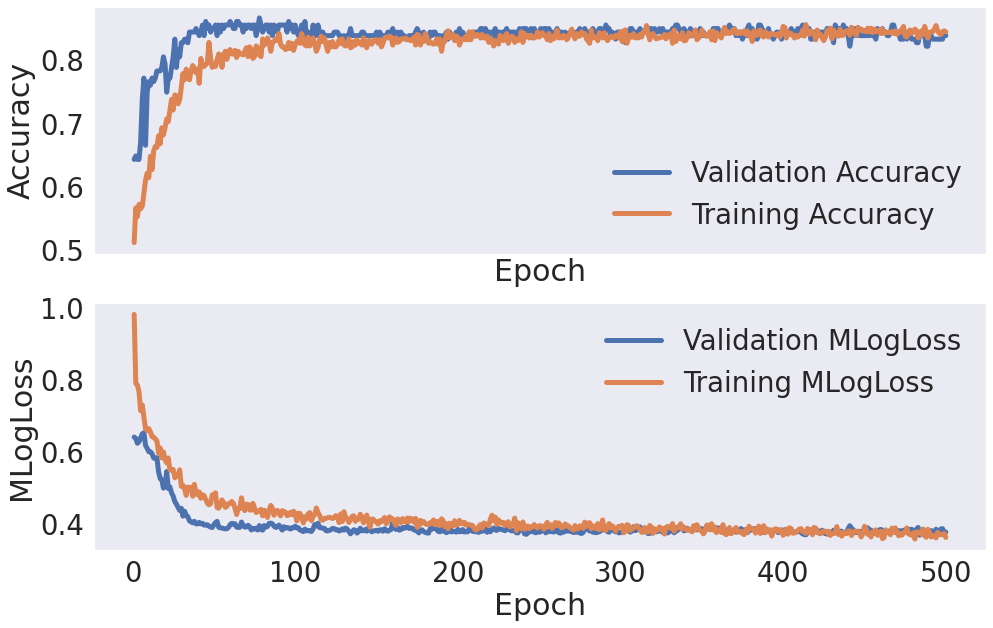

In [ ]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();

# (6) 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_tr, y_tr)
prediction = model_lr.predict(X_vld)

In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 87.71% 정확도로 생존을 맞춤


In [ ]:
importance = model_lr.coef_[0]
print(importance)

[-1.02256537 -1.1238409  -0.03731598  0.25424315 -0.42814808  0.11762871
  1.44115017  0.21704242 -1.37196832  0.8987777  -0.63743502  0.23844737
  0.33578536 -0.02666578]


Feature: 0, Score: -1.02257
Feature: 1, Score: -1.12384
Feature: 2, Score: -0.03732
Feature: 3, Score: 0.25424
Feature: 4, Score: -0.42815
Feature: 5, Score: 0.11763
Feature: 6, Score: 1.44115
Feature: 7, Score: 0.21704
Feature: 8, Score: -1.37197
Feature: 9, Score: 0.89878
Feature: 10, Score: -0.63744
Feature: 11, Score: 0.23845
Feature: 12, Score: 0.33579
Feature: 13, Score: -0.02667


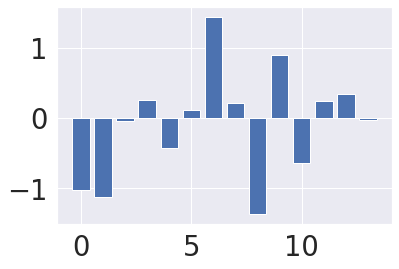

In [ ]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
model_lr.

AttributeError: ignored